# Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules that will be used in this project:

In [282]:
import pandas as pd
from scipy.stats import chi2_contingency

## Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv` and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` and `.count()` to check its content and quantity.

In [283]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [284]:
print(observations.head(3))
print(observations.count())

      scientific_name                            park_name  observations
0  Vicia benghalensis  Great Smoky Mountains National Park            68
1      Neovison vison  Great Smoky Mountains National Park            77
2   Prunus subcordata               Yosemite National Park           138
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


In [285]:
print(species_info.head(3))
print(species_info.count())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64


## Analysis

#### Distribution of conservation status

The column `conservation_status` has a range of several values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In [286]:
species_info['conservation_status'].value_counts(dropna=False)

conservation_status
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

In [287]:
conservation_status_distribution = pd.crosstab(
  species_info['conservation_status'], 
  species_info['category'], 
  margins=True, 
  margins_name='Total'
  )

conservation_status_distribution

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant,Total
conservation_status,,,,,,,,
Endangered,1,4,3,7,0,0,1,16
In Recovery,0,3,0,1,0,0,0,4
Species of Concern,4,72,4,28,5,5,43,161
Threatened,2,0,4,2,0,0,2,10
Total,7,79,11,38,5,5,46,191


Text(0, 0.5, 'Number of Species')

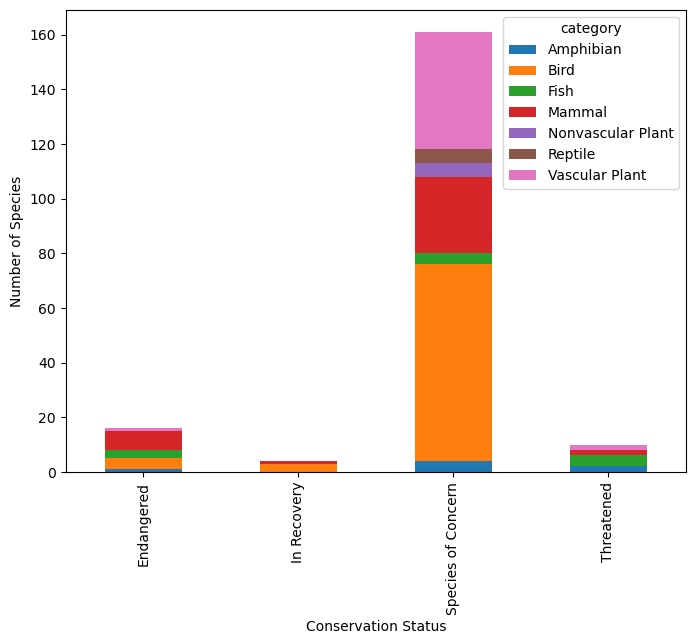

In [288]:
conservation_status_distribution.drop('Total', axis=0, inplace=True)
conservation_status_distribution.drop('Total', axis=1, inplace=True)
ax = conservation_status_distribution.plot(kind='bar', figsize=(8,6),
                       stacked=True)

ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### In conservation

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [289]:
species_info.fillna('No Intervention', inplace=True)
species_info['conservation_status'].value_counts()

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

The next question is if certain types of species are more likely to be endangered? 

This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`.

In [290]:
species_info['is_protected'] = species_info.conservation_status != 'No Intervention'
species_info['is_protected'].value_counts()

is_protected
False    5633
True      191
Name: count, dtype: int64

Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [291]:
category_counts = species_info.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. 

From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

Only ~1 percent of vascular plants and ~2 percent of nonvascular plants were under protection, which make those categories as weakly protected.

In [292]:
category_counts['percent_protected'] = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100, 2)
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [293]:
contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [294]:
contingency2 = [[30, 146],
                [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

#### Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the the pivot table from `observations`.

In [295]:
observations_counts_pivot = pd.pivot_table(observations, values='observations', index=['scientific_name', 'park_name'], aggfunc="sum").reset_index()
observations_counts_pivot

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83
...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237


The next step is to make the pivot table from `species_info` to see unique scientific name values and concrete category for each.

In [296]:
species_info_pivot = pd.pivot_table(species_info, index=['scientific_name', 'category'], aggfunc="size").reset_index()
species_info_pivot = species_info_pivot[['scientific_name', 'category']]
species_info_pivot

,scientific_name,category
0,Abies bifolia,Vascular Plant
1,Abies concolor,Vascular Plant
2,Abies fraseri,Vascular Plant
3,Abietinella abietina,Nonvascular Plant
4,Abronia ammophila,Vascular Plant
...,...,...
5536,Zonotrichia leucophrys gambelii,Bird
5537,Zonotrichia leucophrys oriantha,Bird
5538,Zonotrichia querula,Bird
5539,Zygodon viridissimus,Nonvascular Plant


Then we merge pivot tables of `observations` and `species_info` in to a new data frame.

In [297]:
observations_counts_merged = pd.merge(species_info_pivot, observations_counts_pivot, on ='scientific_name', how='inner')
observations_counts_merged

,scientific_name,category,park_name,observations
0,Abies bifolia,Vascular Plant,Bryce National Park,109
1,Abies bifolia,Vascular Plant,Great Smoky Mountains National Park,72
2,Abies bifolia,Vascular Plant,Yellowstone National Park,215
3,Abies bifolia,Vascular Plant,Yosemite National Park,136
4,Abies concolor,Vascular Plant,Bryce National Park,83
...,...,...,...,...
22159,Zygodon viridissimus,Nonvascular Plant,Yosemite National Park,159
22160,Zygodon viridissimus var. rupestris,Nonvascular Plant,Bryce National Park,102
22161,Zygodon viridissimus var. rupestris,Nonvascular Plant,Great Smoky Mountains National Park,102
22162,Zygodon viridissimus var. rupestris,Nonvascular Plant,Yellowstone National Park,237


Now the data is ready to be able to count the number of observations of each category in all specified parks. 

In [298]:
observations_counts_category = pd.pivot_table(observations_counts_merged, values='observations', index=['category', 'park_name'], aggfunc="sum").reset_index()
observations_counts_category

,category,park_name,observations
0,Amphibian,Bryce National Park,7380
1,Amphibian,Great Smoky Mountains National Park,5707
2,Amphibian,Yellowstone National Park,19440
3,Amphibian,Yosemite National Park,11444
4,Bird,Bryce National Park,51647
5,Bird,Great Smoky Mountains National Park,37728
6,Bird,Yellowstone National Park,127251
7,Bird,Yosemite National Park,76207
8,Fish,Bryce National Park,12423
9,Fish,Great Smoky Mountains National Park,9206


From this analysis, it seems that `Vascular Plants` were observed 2555090 times while `Birds` came up 292833 times.

In [299]:
observations_counts_category_plot = pd.pivot_table(observations_counts_category, values='observations', index='category', aggfunc="sum")
observations_counts_category_plot = observations_counts_category_plot.sort_values(by='observations', ascending=False)
observations_counts_category_plot

,observations
category,
Vascular Plant,2555090
Bird,292833
Nonvascular Plant,190653
Mammal,116696
Fish,70818
Reptile,44678
Amphibian,43971


Let's see how many total Vascular Plant observations across all species categories were made at each national park.

The total number of Vascular Plant observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 1,112,927 observations and the Great Smoky Mountains National Park having the lowest with 333,619.

In [300]:
vascular_plant_data = observations_counts_category[observations_counts_category['category'] == 'Vascular Plant']
vascular_plant_data = vascular_plant_data.sort_values(by='observations', ascending=False)
vascular_plant_data

,category,park_name,observations
26,Vascular Plant,Yellowstone National Park,1112927
27,Vascular Plant,Yosemite National Park,665461
24,Vascular Plant,Bryce National Park,443083
25,Vascular Plant,Great Smoky Mountains National Park,333619


## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation, which is 5633 versus 191.
- Are certain types of species more likely to be endangered?
    - Vascular Plants and Nonvascular Plants had the lowest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which species category was spotted the most at each park?
    - the study found that Vascular Plants occurred the most number of times and they were most likely to be found in Yellowstone National Park.